In [1]:
from nltk.corpus import movie_reviews
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, SimpleRNN, LSTM, Bidirectional, GRU
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileids = movie_reviews.fileids()
reviews = [movie_reviews.raw(fileid) for fileid in fileids]
categories = [movie_reviews.categories(fileid)[0] for fileid in fileids]
len(reviews), set(categories)

(2000, {'neg', 'pos'})

In [3]:
np.random.seed(7)
tf.random.set_seed(7)
max_words = 10000

In [5]:
tokenizer = Tokenizer(num_words=max_words, oov_token='UNK')
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)
print(len(X), '\n\n', [len(doc) for doc in X[:10]])

2000 

 [710, 240, 486, 479, 733, 671, 550, 584, 702, 776]


In [7]:
tokenizer.word_index['the'], tokenizer.word_index['UNK']

(2, 1)

In [8]:
maxlen = 500
X = pad_sequences(X, maxlen=maxlen, truncating='pre')

In [10]:
label_dict = {'pos':1, 'neg':0}
y = np.array([label_dict[c] for c in categories])
len(y)

2000

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape

((1600, 500), (400, 500))

In [29]:
model = Sequential([Embedding(max_words, 32, input_length=maxlen),
                    Flatten(),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 32)           320000    
                                                                 
 flatten_2 (Flatten)         (None, 16000)             0         
                                                                 
 dense_7 (Dense)             (None, 1)                 16001     
                                                                 
Total params: 336001 (1.28 MB)
Trainable params: 336001 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
40/40 [==============================] - 1s 8ms/step - loss: 0.6919 - acc: 0.5180 - val_loss: 0.6909 - val_acc: 0.5312
Epoch 2/30
40/40 [==============================] - 0s 5ms/step - loss: 0.5929 - acc: 0.9266 - val_loss: 0.6855 - val_acc: 0.5813
Epoch 3/30
40/40 [==============================] - 0s 6ms/step - loss: 0.4491 - acc: 0.9836 - val_loss: 0.6723 - val_acc: 0.6094
Epoch 4/30
40/40 [==============================] - 0s 6ms/step - loss: 0.2741 - acc: 0.9945 - val_loss: 0.6525 - val_acc: 0.6094
Epoch 5/30
40/40 [==============================] - 0s 5ms/step - loss: 0.1450 - acc: 1.0000 - val_loss: 0.6377 - val_acc: 0.6313
Epoch 6/30
40/40 [==============================] - 0s 5ms/step - loss: 0.0790 - acc: 1.0000 - val_loss: 0.6256 - val_acc: 0.6406
Epoch 7/30
40/40 [==============================] - 0s 6ms/step - loss: 0.0477 - acc: 1.0000 - val_loss: 0.6190 - val_acc: 0.6500
Epoch 8/30
40/40 [==============================] - 0s 6ms/step - loss: 0.0318 - acc: 1.00

In [31]:
history.history['val_acc']

[0.53125,
 0.581250011920929,
 0.609375,
 0.609375,
 0.6312500238418579,
 0.640625,
 0.6499999761581421,
 0.6468750238418579,
 0.653124988079071,
 0.6468750238418579,
 0.653124988079071,
 0.65625,
 0.659375011920929,
 0.65625,
 0.6656249761581421,
 0.6625000238418579,
 0.6625000238418579,
 0.6656249761581421,
 0.6625000238418579,
 0.668749988079071,
 0.6625000238418579,
 0.668749988079071,
 0.668749988079071,
 0.668749988079071,
 0.668749988079071,
 0.668749988079071,
 0.668749988079071,
 0.671875,
 0.668749988079071,
 0.668749988079071]

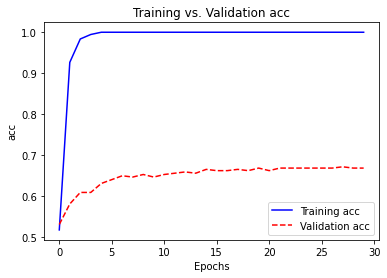

In [32]:
def plot_results(history, metric):
    plt.plot(history.history[metric], 'b', label='Training '+metric)
    plt.plot(history.history['val_'+metric], 'r--', label='Validation '+metric)
    plt.title('Training vs. Validation '+metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()

plot_results(history, 'acc')

In [33]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 2ms/step - loss: 0.5961 - acc: 0.6900


[0.596061646938324, 0.6899999976158142]

In [34]:
model = Sequential([Embedding(max_words, 32, input_length=maxlen),
                    SimpleRNN(32),
                    Dense(32, activation='leaky_relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 500, 32)           320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 323169 (1.23 MB)
Trainable params: 323169 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)
history

Epoch 1/20
40/40 [==============================] - 3s 56ms/step - loss: 0.6947 - acc: 0.5203 - val_loss: 0.6970 - val_acc: 0.4750
Epoch 2/20
40/40 [==============================] - 2s 52ms/step - loss: 0.6438 - acc: 0.7133 - val_loss: 0.7017 - val_acc: 0.5063
Epoch 3/20
40/40 [==============================] - 2s 52ms/step - loss: 0.4384 - acc: 0.8719 - val_loss: 0.6924 - val_acc: 0.6281
Epoch 4/20
40/40 [==============================] - 2s 51ms/step - loss: 0.1229 - acc: 0.9820 - val_loss: 0.8455 - val_acc: 0.6000
Epoch 5/20
40/40 [==============================] - 2s 52ms/step - loss: 0.0253 - acc: 0.9984 - val_loss: 0.9780 - val_acc: 0.5562
Epoch 6/20
40/40 [==============================] - 2s 53ms/step - loss: 0.0077 - acc: 0.9992 - val_loss: 1.0406 - val_acc: 0.5688
Epoch 7/20
40/40 [==============================] - 2s 51ms/step - loss: 0.0046 - acc: 0.9992 - val_loss: 1.2697 - val_acc: 0.6125
Epoch 8/20
40/40 [==============================] - 2s 51ms/step - loss: 0.0026 - a

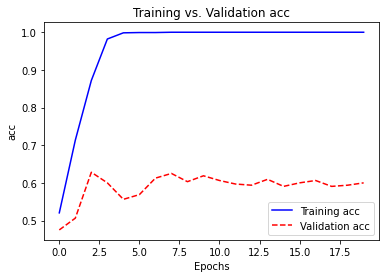

In [36]:
plot_results(history, 'acc')

In [37]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 0s 11ms/step - loss: 1.4651 - acc: 0.5875


[1.4650583267211914, 0.5874999761581421]

In [38]:
model = Sequential([Embedding(max_words, 64, input_length=maxlen),
                    Bidirectional(GRU(64)),
                    Dense(64, activation='leaky_relu'),
                    Dense(1, activation='sigmoid')])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 128)               49920     
 al)                                                             
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 698241 (2.66 MB)
Trainable params: 698241 (2.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.2)
history

Epoch 1/20
40/40 [==============================] - 7s 126ms/step - loss: 0.6916 - acc: 0.5281 - val_loss: 0.6925 - val_acc: 0.5125
Epoch 2/20
40/40 [==============================] - 4s 113ms/step - loss: 0.6916 - acc: 0.7023 - val_loss: 0.6955 - val_acc: 0.5625
Epoch 3/20
40/40 [==============================] - 5s 113ms/step - loss: 0.3228 - acc: 0.8766 - val_loss: 0.7923 - val_acc: 0.6469
Epoch 4/20
40/40 [==============================] - 4s 112ms/step - loss: 0.0768 - acc: 0.9758 - val_loss: 0.9833 - val_acc: 0.6469
Epoch 5/20
40/40 [==============================] - 4s 111ms/step - loss: 0.0244 - acc: 0.9961 - val_loss: 1.1110 - val_acc: 0.6969
Epoch 6/20
40/40 [==============================] - 5s 113ms/step - loss: 0.0100 - acc: 0.9984 - val_loss: 1.0512 - val_acc: 0.6969
Epoch 7/20
40/40 [==============================] - 4s 112ms/step - loss: 0.0038 - acc: 0.9992 - val_loss: 1.1965 - val_acc: 0.7125
Epoch 8/20
40/40 [==============================] - 4s 112ms/step - loss: 0.

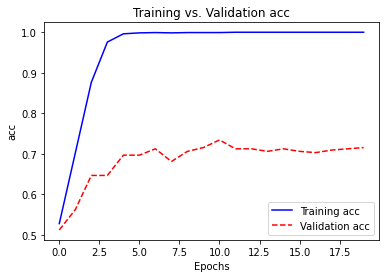

In [40]:
plot_results(history, 'acc')

In [41]:
score = model.evaluate(X_test, y_test)
score

13/13 [==============================] - 1s 31ms/step - loss: 1.5772 - acc: 0.7450


[1.5771962404251099, 0.7450000047683716]

In [46]:
y_pred = np.round(model.predict(X_test))
for pred, y_t in zip(y_pred[:10], y_test[:10]):
    print(f'predicted value: {pred[0]}, true value: {y_t}, so the prediction is {pred[0] == y_t}')

13/13 [==============================] - 0s 30ms/step
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 1.0, true value: 1, so the prediction is True
predicted value: 0.0, true value: 1, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 0.0, true value: 0, so the prediction is True
predicted value: 1.0, true value: 0, so the prediction is False
predicted value: 0.0, true value: 0, so the prediction is True
